# Assignment 7

In [133]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math

### Q1

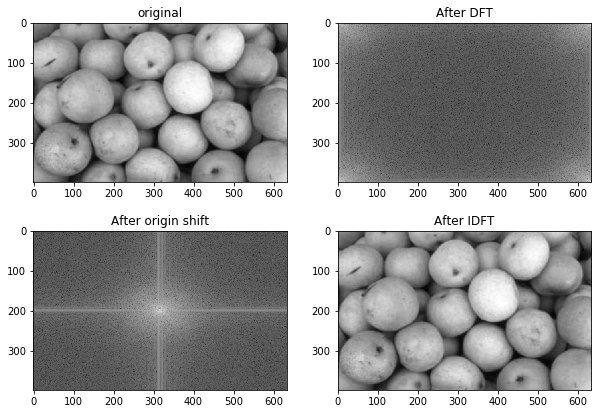

In [110]:
f = cv2.imread('images/apple.jpeg',0)
M, N = f.shape

F = np.fft.fft2(f)              # calculating DFT
fshift = np.fft.fftshift(F)     # shifting origin to the center

IF = np.fft.ifft2(F)            # calculating IDFT



fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2,2,1)
plt.title('original')
plt.imshow(f, cmap='gray')

fig.add_subplot(2,2,2)
plt.title('After DFT')
plt.imshow(np.log10(np.abs(F)), cmap='gray')

fig.add_subplot(2,2,3)
plt.title('After origin shift')
plt.imshow(np.log10(np.abs(fshift)), cmap='gray')

fig.add_subplot(2,2,4)
plt.title('After IDFT')
plt.imshow(np.abs(IF), cmap='gray')

plt.show()

### Q2

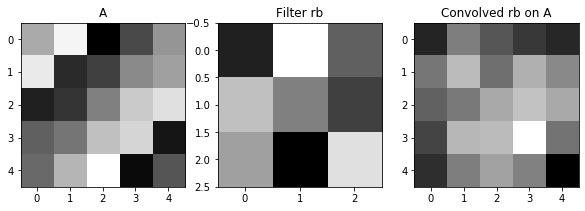

In [122]:
A = np.array([[17, 24, 1, 8, 15],
              [23, 5, 7, 14, 16],
              [4, 6, 13, 20, 22],
              [10,12, 19, 21, 3],
              [11, 18, 25, 2, 9]])

b = np.array([[8, 1, 6],
              [3, 5, 7],
              [4, 9, 2]])

rb = np.rot90(b, 2) # rotate the matrix b 180 deg


# adding a 0 padding around the image
padded_A = np.zeros((A.shape[0] + 2, A.shape[1] + 2))
padded_A[1:-1, 1:-1] = A

# Convolving rb on padded_A
conv_A = np.zeros(padded_A.shape, dtype = np.uint8)
for i in range(1, padded_A.shape[0]-1):
    for j in range(1, padded_A.shape[1]-1):
        conv_A[i, j] = 1/9 * np.sum(np.multiply(padded_A[i-1:i+2, j-1:j+2], rb))
    

    
fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1,3,1)
plt.title('A')
plt.imshow(A, cmap='gray')

fig.add_subplot(1,3,2)
plt.title('Filter rb')
plt.imshow(rb, cmap='gray')

fig.add_subplot(1,3,3)
plt.title('Convolved rb on A')
plt.imshow(conv_A[1:-1, 1:-1], cmap='gray')

plt.show()

### Q3

#### Function

In [311]:
def Sobel(padded_A):
    # Convolving bx and by on padded_A
    sobel = np.zeros(padded_A.shape, dtype = np.uint8)
    for i in range(1, padded_A.shape[0]-1):
        for j in range(1, padded_A.shape[1]-1):
            val_x = 1/9 * np.sum(np.multiply(padded_A[i-1:i+2, j-1:j+2], bx))
            val_y = 1/9 * np.sum(np.multiply(padded_A[i-1:i+2, j-1:j+2], by))
            
            sobel[i, j] = np.ceil(np.sqrt(val_x**2 + val_y**2))
    
    return sobel

def Sobel_F(padded_A, bx, by):
    
    bx = np.fft.fft2(bx)
    by = np.fft.fft2(by)
    # Convolving bx and by on padded_A
    sobel = np.zeros(padded_A.shape, dtype = np.complex)
    for i in range(1, padded_A.shape[0]-1):
        for j in range(1, padded_A.shape[1]-1):
            val_x = 1/9 * np.sum(np.multiply(padded_A[i-1:i+2, j-1:j+2], bx))
            val_y = 1/9 * np.sum(np.multiply(padded_A[i-1:i+2, j-1:j+2], by))
                    
            sobel[i, j] = np.sqrt(val_x**2 + val_y**2)
    
    return sobel

#### Spatial / Frequency domain

In [312]:
A = cv2.imread('images/sobel.png',0)

bx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]])

by = np.rot90(bx, 3)

# adding a 0 padding around the image
padded_A = np.zeros((A.shape[0] + 2, A.shape[1] + 2))
padded_A[1:-1, 1:-1] = A

sobel_A = Sobel(padded_A)

Af = np.fft.fft2(padded_A)          # calculating DFT
fshift = np.fft.fftshift(Af)        # shifting origin to the center

sobel_Af = Sobel_F(Af, bx, by)
IF = np.fft.ifft2(sobel_Af)         # calculating IDFT

#### Final Plots

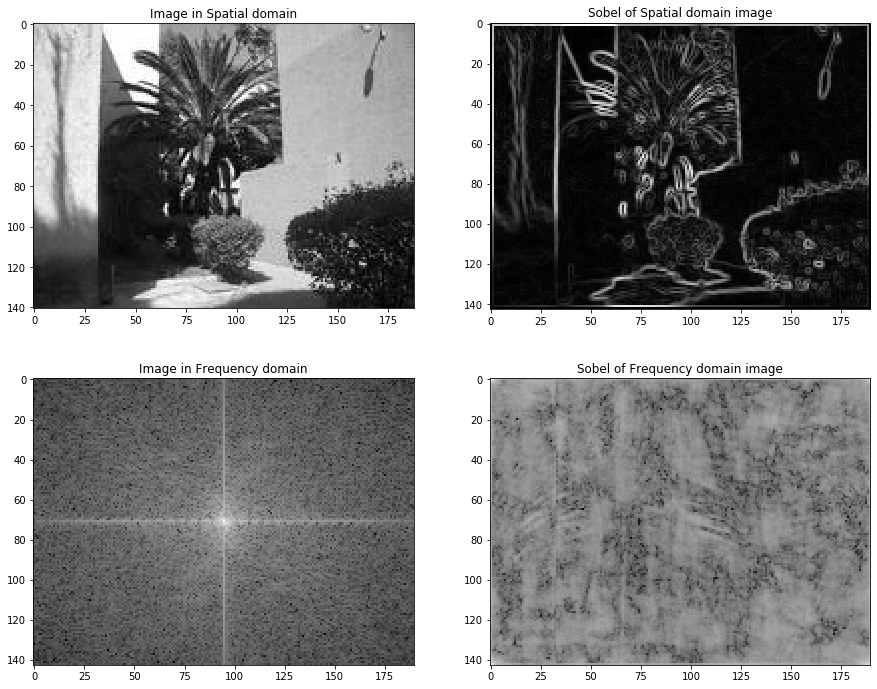

In [313]:
fig = plt.figure(figsize=(15, 12))

fig.add_subplot(2,2,1)
plt.title('Image in Spatial domain')
plt.imshow(A, cmap='gray')

fig.add_subplot(2,2,2)
plt.title('Sobel of Spatial domain image')
plt.imshow(sobel_A, cmap='gray')

fig.add_subplot(2,2,3)
plt.title('Image in Frequency domain')
plt.imshow(np.log10(np.abs(fshift)), cmap='gray')

fig.add_subplot(2,2,4)
plt.title('Sobel of Frequency domain image')
plt.imshow(np.log10(np.abs(IF)), cmap='gray')

plt.show()